In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.ticker import FuncFormatter
from scipy import linalg
import pandas as pd
import torch as tn

Directory where the simulation output files are stored.

In [ ]:
path = 'Reference model simulation directory'

The function *obtain velocity dispersion* reads the output files named *sigma$_{100f_b}$* in the simulation directory and stores their data into a 8$\times$9 matrix. Hence it returns, at varying binary fraction:

1) *$\sigma$* : observed velocity dispersion in km/s (1-D array);

2) *$\sigma_0$* : observed velocity dispersion in km/s (1-D array).

In particular, here *$\sigma$*=*$\sigma_{tot}$* and *$\sigma_0$*=*$\sigma_{sb}$*.

In [7]:
def obtain_velocity_dispersion(path)

    f_b = np.array([0,5,10,15,20,25,30,35,40])

    sigma_matrix = np.zeros(shape=(8,9))
    i = 0
    for number in f_b:
        j = 0
        with open('path/sigma_%i'%int(number), "r") as file:
            for line in file:
                sigma_matrix[j,i]=[float(x) for x in line.split()][0]
                j +=1
        i += 1
    
    sigma = sigma_matrix[0,:]
    sigma_0 = sigma_matrix[1,:]
    
    return sigma, sigma_0

The function *dynamical mass* derives the dynamical mass *M$_{dyn}$* (1-D array) of the system in M$_\odot$ from the observed and the intrinsic velocity dispersion (*$\sigma$* and *$\sigma_0$*, respectively) at varying binary fraction.

In [3]:
def dynamical_mass(R, M_tot, sigma, sigma_0):

    normalized_delta_M = (sigma**2-sigma_0**2)/(sigma_0**2)
    
    M_dyn = (M_tot*normalized_delta_M) + M_tot
    
    ratio = sigma**2/sigma_0**2
    
    return M_dyn

The function *linear interpolation* is intended to perform a linear interpolation of a given quantity *y* as a function of the binary fraction *f$_b$*, and returns the linear interpolation coefficients *w* (1-D array) in M$_\odot$. In particular, the first element of *w* represents the intercept, whereas the second one the slope, of the linear interpolation line.

In [2]:
def linear_interpolation(f_b, y):

    X = np.zeros(shape=(9,2))
    X[:,0] = np.ones(9)
    X[:,1] = f_b

    Z = np.matmul(np.linalg.inv(np.matmul(X.T,X)), X.T) # (X.T X)^-1 X.T
    w = np.matmul(Z,y)
    
    print(w)
    
    return w

The function *check linear interpolation* is meant to check the relation between the dynamical mass *M$_{dyn,interpolated}$* shows an effective linear dependence on the binary fration *f$_b$*; if the plot is not required, then *_plot=False*.

[   55545.58771248 25019345.19254   ]


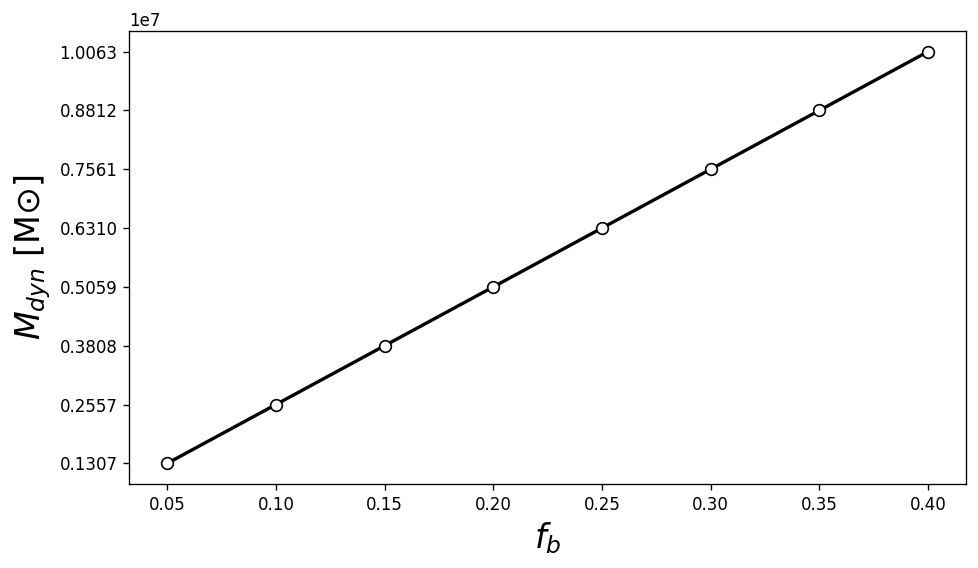

In [9]:
def check_linear_interpolation(f_b, w, _plot=True):
    
    M_dyn_interpolated = w[0] + w[1]*f_b
    
    if _plot:
    
        plt.figure(figsize=(9,5), dpi=120)
        X = f_b
        Y = M_dyn_interpolated
        plt.plot(X, Y, marker='o', markersize=7, mfc='white', mec='black', color='black', linewidth=2, alpha=1)
        plt.xlabel('$f_b$', fontsize=20)
        plt.ylabel('$M_{dyn}$ [M$_\odot$]', fontsize=20)
        plt.xticks(ticks=X, fontsize=10)
        plt.yticks(ticks=Y, fontsize=10)
        plt.show()
    
    return 0

Functions initialization, where *R*=50 pc and *M$_{tot}$*=5$\times$10$^4$ M$_\odot$ for the simulated UFD, whereas *R*=3$\times$10$^3$ pc and *M$_{tot}$*=10$^7$ M$_\odot$ for the simulated dSph.
Note that, in the case of a dSph with RLOF rejection and luminosity cut-off, the original binary fraction *f$_b$* must be replaced by the new binary fraction *f$_{b,new}$* when performing both the linear interpolation and its check.

In [ ]:
f_b = np.array([0,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40])

# f_b_new = np.array([0,0.09,0.16,0.23,0.28,0.33,0.37,0.41,0.44])

sigma, sigma_0 = obtain_velocity_dispersion(path)

M_dyn =  dynamical_mass(R, M_tot, sigma, sigma_0)

w = linear_interpolation(f_b, M_dyn)

check_linear_interpolation(f_b, w, _plot=True)